<a href="https://colab.research.google.com/github/v41bh4v/Qiskit_step_by_step/blob/master/Bernstein_Vazirani_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install qiskit


     |████████████████████████████████| 6.7MB 2.7MB/s 
     |████████████████████████████████| 23.3MB 1.7MB/s 
     |████████████████████████████████| 163kB 46.8MB/s 
     |████████████████████████████████| 184kB 47.4MB/s 
     |████████████████████████████████| 1.9MB 45.0MB/s 
     |████████████████████████████████| 5.8MB 45.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 962kB 43.4MB/s 
     |████████████████████████████████| 296kB 47.3MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 583kB 43.0MB/s 
     |████████████████████████████████| 26.1MB 169kB/s 
     |████████████████████████████████| 2.7MB 41.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.6-cp36-none-any.whl size=3019 sha256=a2537b479db9efd1eff80bccf7e84d0389968b75706052b156a087cdef141a3e
  Stored in directory: /root/.cache/pip/wheels/35/45/55/8b82d355edf738eb

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [14]:
n = 3 # number of qubits used to represent s
s = '110'   # the hidden binary string

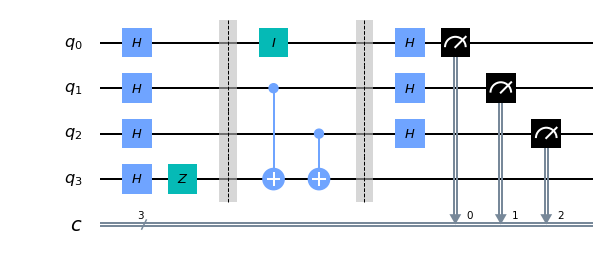

In [15]:
# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

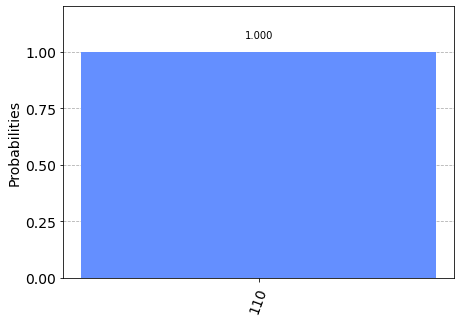

In [16]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [17]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.save_account('6540e36d3f9476d104af16f52ef0ca6eb678b9936b7e43c48570ac609a034a052e86ddf374a7ee046d4f108244b3a71916c057585b15bcd3923f8560c6a24a13')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

configrc.store_credentials:WARNING:2020-08-08 19:57:27,771: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-08-08 19:57:28,643: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_london


In [18]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(bv_circuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


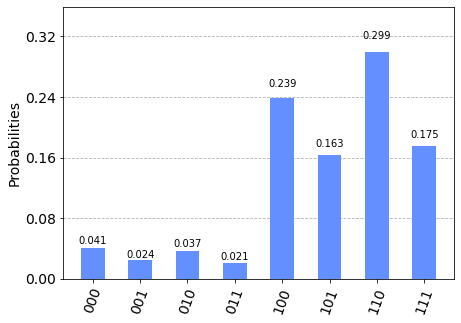

In [19]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)